In [70]:
import numpy as np
import csv
import os  
import astropy.stats as ap
from scipy.optimize import curve_fit 
from matplotlib.patches import Ellipse
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [71]:
'''
    The goal of this program is to make a dictionary out of the data files
    The stucture of this dictionary should be {date:filter:[obser]}
'''
# #This section uses the names in the folder to create the correct structure for data
# for root, dirs, filenames in os.walk('C:/Users/Erick/Desktop/OU REU/NGC663/RADec Obser'):
#     data = {}
#     for fi in filenames:
#         date = fi[:8]
#         fil = fi[8:9]
#         print('for',fi,'the date is',date, ',filter is', fil)
#         if date not in data.keys():
#             print('whoops')
#             data[str(date)]={fil:{}}
#         else:
#             data[str(date)][fil]={}

'''The goal of this program is to make a dictionary out of the data files
    The stucture of this dictionary should be {date:filter:[obser]}'''
for root, dirs, filenames in os.walk(os.getcwd() +r'\NGC663\RADec Obser'):
    data = {}
    for fi in filenames:
        
        with open(root+'/'+fi) as f:
            date = fi[:8]
            fil = fi[8:9]
            a=[]
            test = csv.reader(f)
            for row in test:
                if row != []:
                    a.append(row)
            final = np.asarray(a)
            col= ['RA','Dec','q','qerr','u','uerr']
            print('for',fi,'the date is',date, ',filter is', fil)
            if date not in data.keys():
                print('whoops')
                data[str(date)]={fil:[final[:,0],final[:,1],final[:,2],final[:,4],final[:,4],final[:,5]]}
            else:
                data[str(date)][fil]=[final[:,0],final[:,1],final[:,2],final[:,4],final[:,4],final[:,5]]

for 20150120Blistfinal.csv the date is 20150120 ,filter is B
whoops
for 20150120Ilistfinal.csv the date is 20150120 ,filter is I
for 20150123Rlistfinal.csv the date is 20150123 ,filter is R
whoops
for 20150123Vlistfinal.csv the date is 20150123 ,filter is V
for 20151002Blistfinal.csv the date is 20151002 ,filter is B
whoops
for 20151002Ilistfinal.csv the date is 20151002 ,filter is I
for 20151002Rlistfinal.csv the date is 20151002 ,filter is R
for 20151002Vlistfinal.csv the date is 20151002 ,filter is V
for 20151003Blistfinal.csv the date is 20151003 ,filter is B
whoops
for 20151003Ilistfinal.csv the date is 20151003 ,filter is I
for 20151003Rlistfinal.csv the date is 20151003 ,filter is R
for 20151003Vlistfinal.csv the date is 20151003 ,filter is V
for 20151202Blistfinal.csv the date is 20151202 ,filter is B
whoops
for 20151202Ilistfinal.csv the date is 20151202 ,filter is I
for 20151202Rlistfinal.csv the date is 20151202 ,filter is R
for 20151202Vlistfinal.csv the date is 20151202 ,f

In [72]:
def gaussian(x, a, b, c): # a is the amplitude, b is the center, c is the width, and d is the offset in y
    return a * np.exp(-(x-b)**2 /c) 

def chisq(y, y_model, err):
    return np.sum((np.subtract(y,y_model)/err)**2)

def multi_gauss(x, *p): # In retrospect, this could be used for part a as well with some minor changes to a's 
    y = np.zeros_like(x)     # architecture. But, "if it ain't broken..."
    for i in range(0, len(p)-1, 3):
        a = p[i]
        b = p[i+1]
        c = p[i+2]
        y += gaussian(x, a, b, c)
    d = p[-1]
    return y

def report_fits(fits, fit_ids):
    statement = "The fit parameters are :"
    for i in range(len(fits)):
        statement+=' '+(fit_ids[i]+str(fits[i]))+','
    return statement[:-2]


1389 151 0.3883789126833544 0.321202572


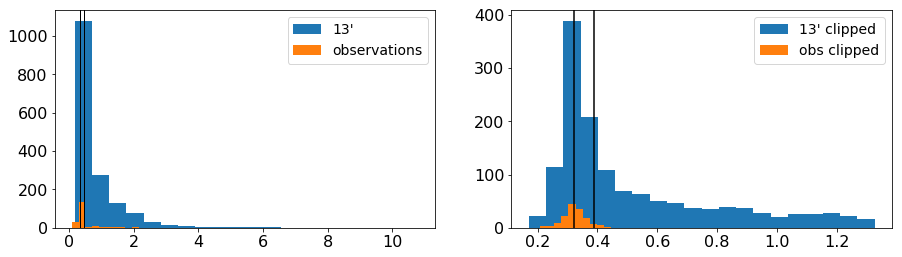

In [73]:
paralaxg,peg = np.loadtxt(os.getcwd()+r"\NGC663\ARE YOU NOT CORRECT\13' Full NGC663.csv", skiprows=1,usecols=(5,6),unpack=True,delimiter=',')
ind, paralax,poe = np.loadtxt(os.getcwd()+r'\NGC663\Gaia\i20161021-result.csv', skiprows=1,usecols=(97,10,12),unpack=True,delimiter=',')

#'C:/Users/Erick/Desktop/OU REU/NGC663/ARE YOU NOT CORRECT/Gaia Cluster.csv'
#cutting out negative paralaxes
paralaxg= paralaxg[paralaxg>0]
paralax= paralax[paralax>0]

plt.figure(figsize=(15,4))

#plotting all of the paralaxes
plt.subplot(1,2,1)
plt.hist(paralaxg,bins=20,label="13'")
plt.hist(paralax,bins=20,label='observations')
plt.axvline(x=np.median(paralaxg),c='k',linewidth=1)
plt.axvline(x=np.median(paralax),c='k',linewidth=1)
plt.legend()


#sigma clipping the paralaxes before plotting
b=np.ma.compressed(ap.sigma_clip(paralaxg,sigma=3,iters=5))
c=np.ma.compressed(ap.sigma_clip(paralax,sigma=2.5,iters=5))
plt.subplot(1,2,2)
plt.hist(b,bins=20,label="13' clipped")
plt.hist(c,label='obs clipped')
plt.axvline(x=np.median(b),c='k',linewidth=1.5)
plt.axvline(x=np.median(c),c='k',linewidth=1.5)
print(len(b),len(c),np.median(b),np.median(c))
plt.legend()

the median is  2.9787286081616795
[10.28277037  0.07203032  0.31834616 11.50283107  0.04153227  0.0773961 ]
The fit parameters are : Amplitude 1 = 136.13289348421688, Central Value 1 = 0.9620654203242919, Width 1 = 1.068083376588471, Amplitude 2 = 185.93073752139654, Central Value 2 = 3.014027436220696, Width 2 = 0.437601935664754
our median is 3.0287370267589484
3.014027436220696 185.93073752139654 0.4376019356647543
[0.23111590943980356, 0.5878128885856645]


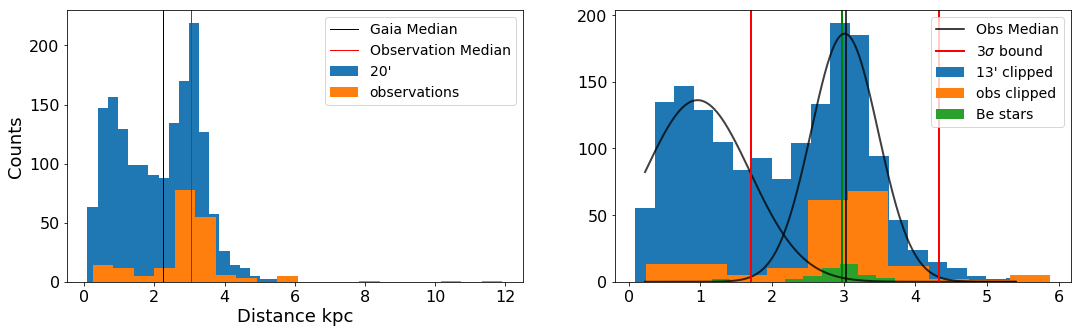

In [74]:

#changing from paralaxes to distances for a better clip
distanceg=[1/a for a in paralaxg]
distance=[1/a for a in paralax]

#Be stars from Yu
row= np.genfromtxt(os.getcwd()+r'\NGC663\ARE YOU NOT CORRECT\xmatch.csv',usecols=11,dtype='str',delimiter=',',skip_header=1)
distancish= [1/a.astype(float) for a in row]

plt.figure(1,figsize=(18,5))

#plotting the distances from gaia's 20' crossmatch and from our observation
plt.subplot(1,2,1)
plt.hist(distanceg,bins=20,label="20'")
plt.hist(distance,bins=20,label='observations')
plt.axvline(x=np.median(distanceg),c='k',linewidth=1,label='Gaia Median')
plt.axvline(x=np.median(distance),c='r',linewidth=1,label='Observation Median')
plt.ylabel("Counts")
plt.xlabel("Distance kpc")
plt.legend()

#Sigma clipping before plotting the same as before
gaia=np.ma.compressed(ap.sigma_clip(distanceg,sigma=3,iters=10))
obs=np.ma.compressed(ap.sigma_clip(distance,sigma=3,iters=10))
plt.subplot(1,2,2)
y,bins,patches=plt.hist(gaia,bins=20,label="13' clipped")
plt.hist(obs,label='obs clipped')
plt.axvline(x=np.median(obs),c='k',linewidth=1.5,label='Obs Median')

#plotting the distance to the Be stars
plt.hist(distancish,label="Be stars")
plt.axvline(x=np.median(distancish),c='g')
print('the median is ',np.median(distancish))

#Using Kellen's code to make a gaussian for the Gaia histogram
x=(bins[:-1]+bins[1:])/2.
p0 = [120, 0.1, 2, 175, 2.5, 1] # Guess at parameters a1, b1, c1, a2, b2, c2, d
fits, cov = curve_fit(multi_gauss, x, y, p0=p0)
std_err = np.sqrt(np.diag(cov))
print(std_err)
fit_ids = ["Amplitude 1 = ", "Central Value 1 = ", "Width 1 = ",
           "Amplitude 2 = ", "Central Value 2 = ", "Width 2 = "]

print(report_fits(fits, fit_ids))
y_fit = multi_gauss(x, *fits)

#plotting the gaussian over the histogram
xfit = np.linspace(min(x),max(x),1000)
plt.plot(xfit, gaussian(xfit, fits[0], fits[1], fits[2]), alpha= 0.75, c='k')
plt.plot(xfit, gaussian(xfit, fits[3], fits[4], fits[5]), alpha=0.75, c='k')
plt.axvline(x=fits[4]+3*fits[5],c='r',label='3$\sigma$ bound')
plt.axvline(x=fits[4]-3*fits[5],c='r')

plt.legend()
print('our median is',np.median(obs))
print(fits[4],fits[3],fits[5])

#taking the center(fits[4]) and 3 std from it (fits[5]) to find the bound of what we will call the cluster
paralaxBound =[1/(fits[4]+3*fits[5]),1/(fits[4]-3*fits[5])]
print(paralaxBound)

In [75]:
#Cuts takes the filter and key and uses crossmatches csv's from gaia to determine membership
def cuts(key,fil):
    ind, paralax,poe = np.loadtxt(os.getcwd()+r"\NGC663\Gaia"+'\\'+fil.lower()+key+'-result.csv', skiprows=1,usecols=(97,10,12),unpack=True,delimiter=',')
    qc= np.logical_and(paralax>0,poe>5)#This is our quality cut
    pc= np.logical_and(paralax>paralaxBound[0],paralax<paralaxBound[1])#this is the paralax cut
    finalcut= ind[np.logical_and(pc,qc)]-1
    return finalcut

cuts('20161218','B')

array([ 0.,  1.,  4.,  5.,  6.,  7.,  8., 11., 12., 13., 14., 15., 16.,
       17., 18., 21., 22., 23., 24., 30.])

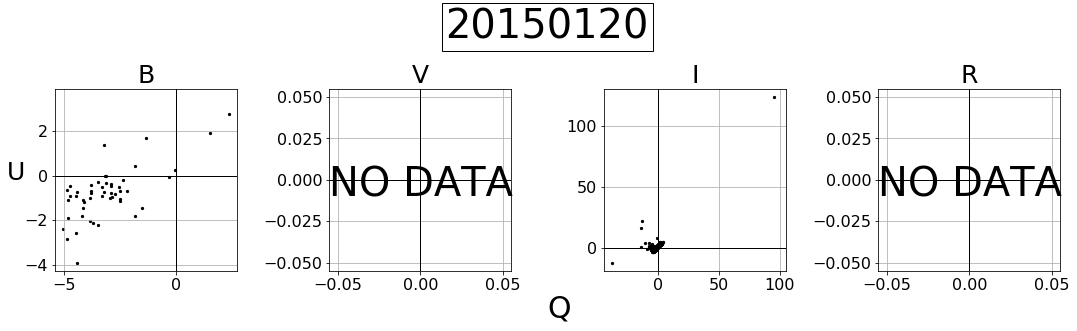

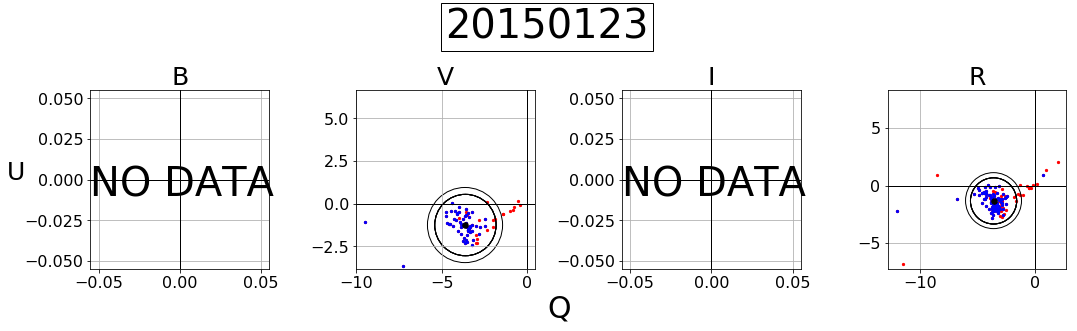

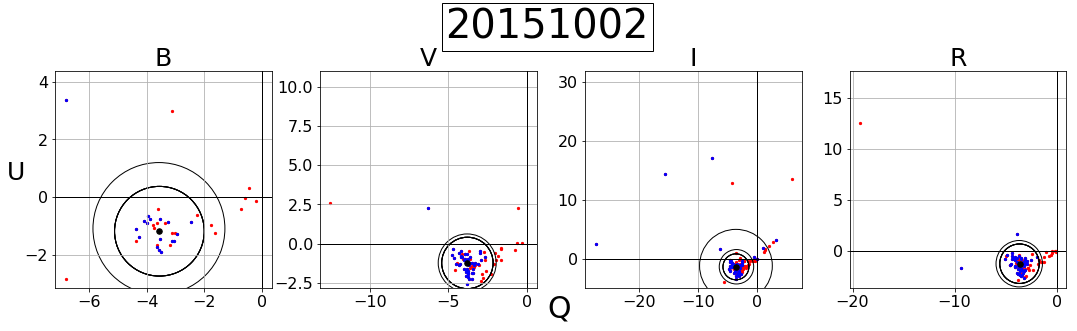

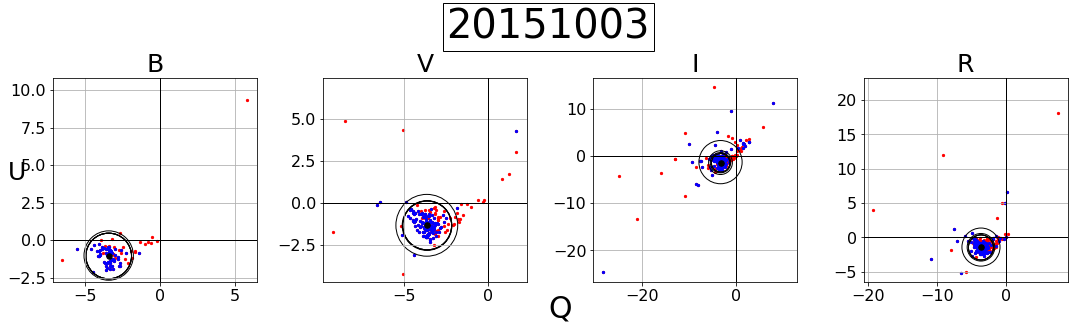

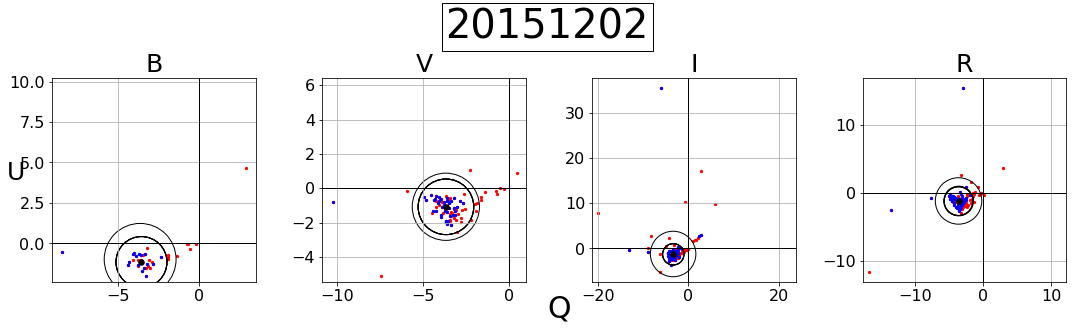

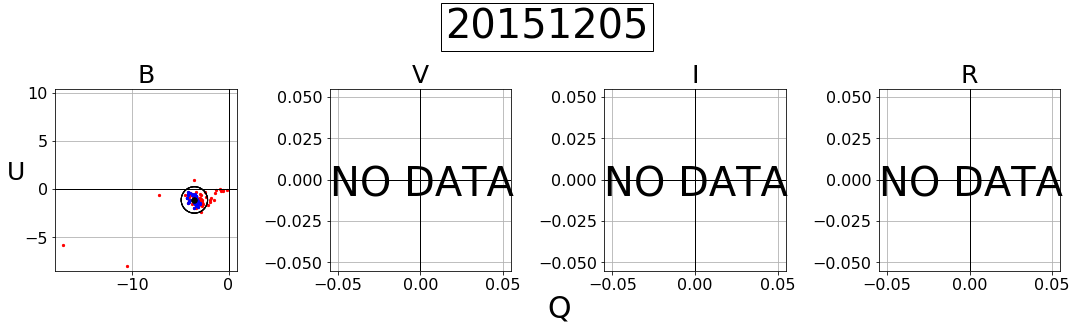

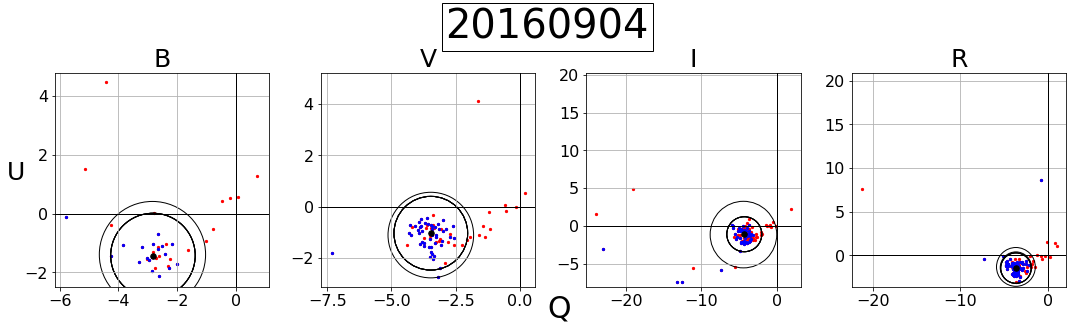

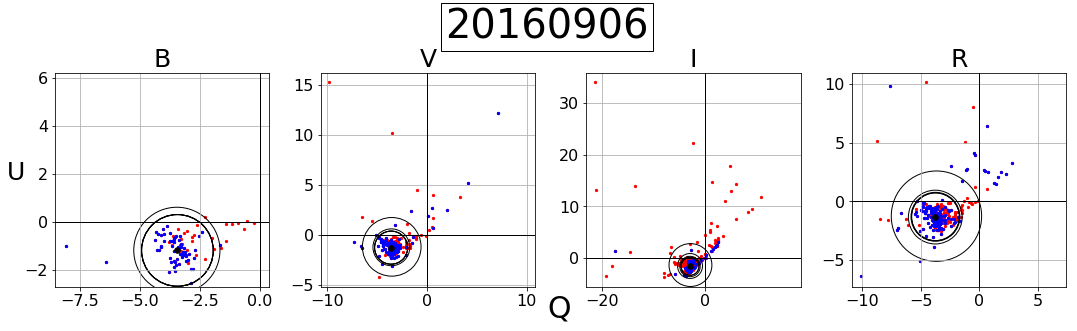

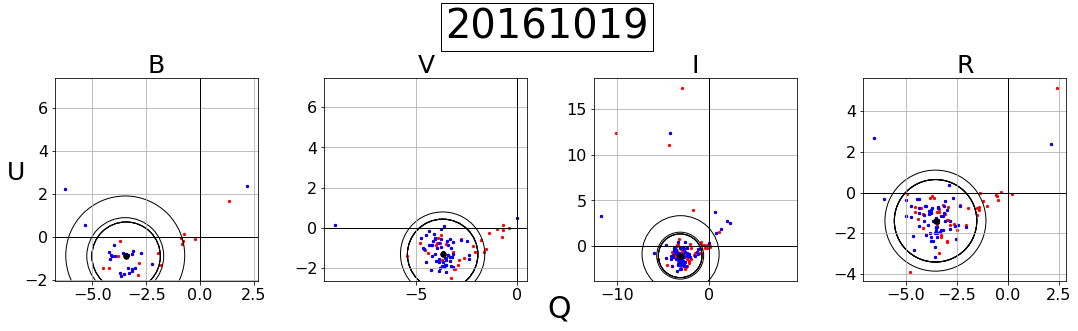

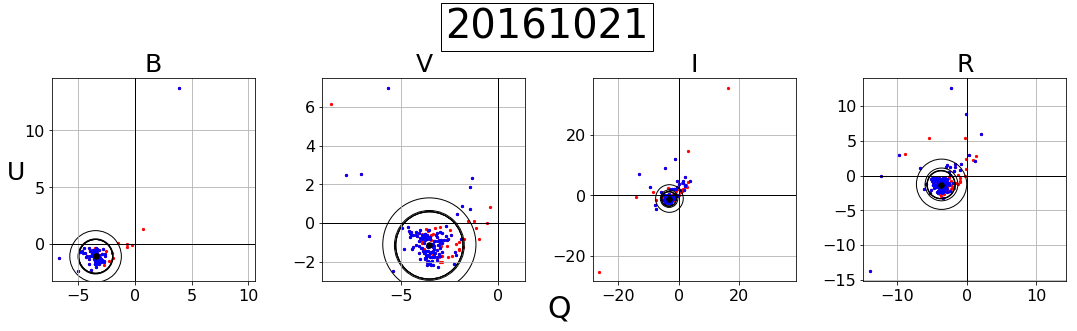

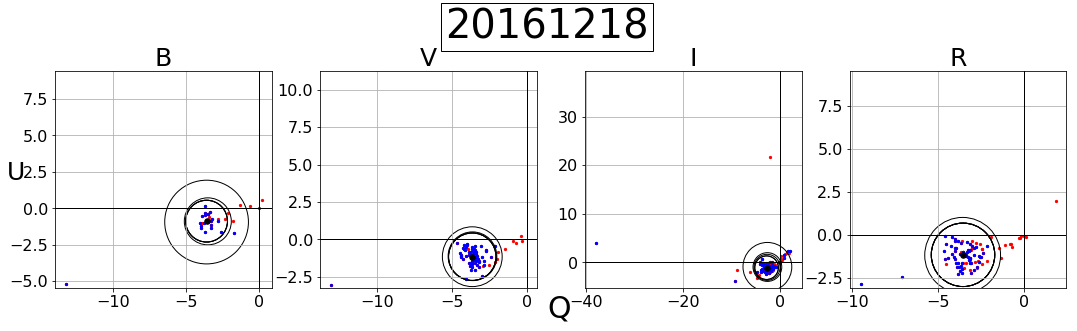

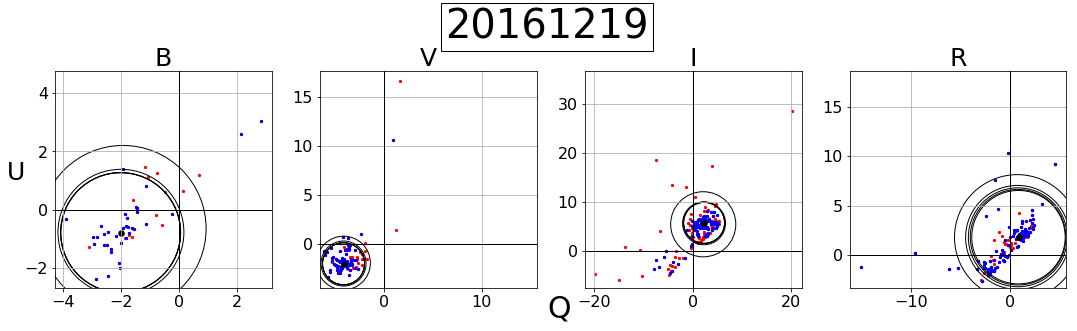

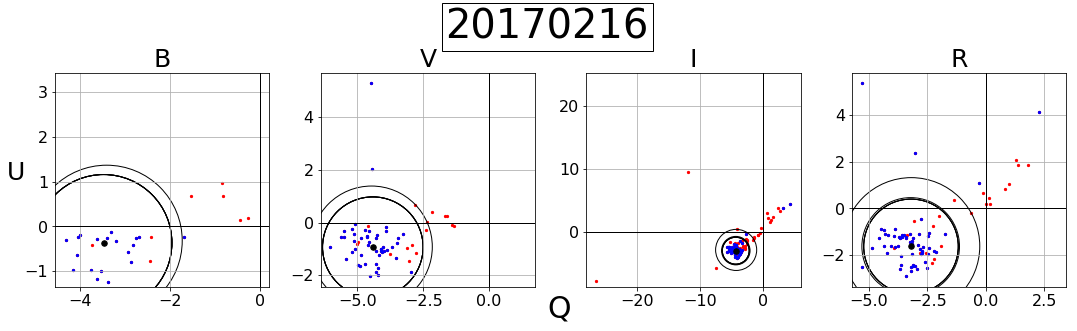

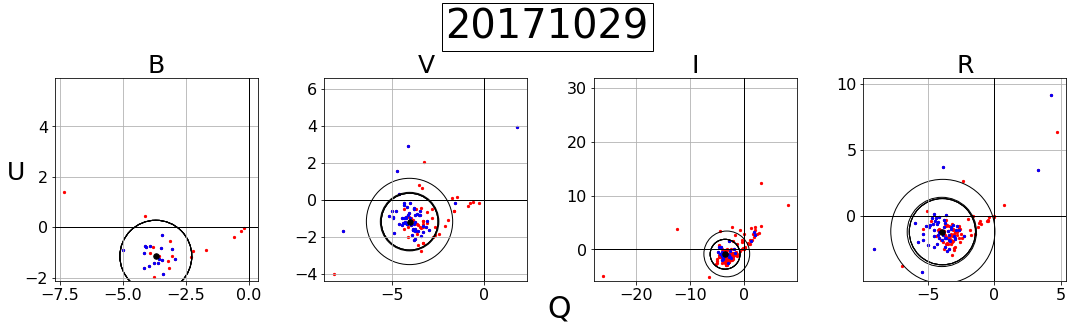

In [76]:

#Cuts takes the filter and key and uses crossmatches csv's from gaia to determine membership
def cuts(key,fil):
    ind, paralax,poe = np.loadtxt(os.getcwd()+r"\NGC663\Gaia"+'\\'+fil.lower()+key+'-result.csv', skiprows=1,usecols=(97,10,12),unpack=True,delimiter=',')
    qc= np.logical_and(paralax>0,poe>5)#This is our quality cut
    pc= np.logical_and(paralax>paralaxBound[0],paralax<paralaxBound[1])#this is the paralax cut
    finalcut= ind[np.logical_and(pc,qc)]-1
    return finalcut

#clipper takes all of the points on the qu plots and takes 3 times the average euclidean 
#distance to cut out far points for a better median value
def clipper(x,y,sigma=3,iters=5):
    xy=np.column_stack([x,y])
    for i in range(iters):
        
        medx=np.median(xy[:,0])
        medy=np.median(xy[:,1])
        
        #this is how far each point is from the median 
        xynorm=np.column_stack([xy[:,0]-medx,xy[:,1]-medy])
        norm=sum(np.linalg.norm(xynorm,axis=1))
        
        #circles will plot with radius of the clip (sigma*avgnorm)
        circle = plt.Circle((medx,medy), sigma*norm/len(xy), color='k',fill=False)
        plt.gca().add_artist(circle)
        
        #this has the the distances appended to the array of xy distances
        xyz=np.column_stack([xy[:,0],xy[:,1],np.linalg.norm(xynorm,axis=1)])
        
        #Removes xy farther than the cut
        xy= xy[xyz[:,2]<=sigma*norm/len(xy)]
        
    #final median
    medx=np.median(xy[:,0])
    medy=np.median(xy[:,1])
    
    return [medx,medy]


#this will run through each date (key), and each filter (color) and plot the qu's
#Blue=in cluster, red= not in cluster, black=can't find file 
i=1
qu={}
for key in data.keys():
    plt.figure(i,figsize=(15,5),frameon=True)
    plt.figtext(x=0,y=.5,s='U',fontsize='25')
    plt.figtext(x=0.5,y=0.1,va='bottom',s='Q',fontsize='30')
    plt.suptitle(key,fontsize=40,bbox=dict(facecolor='none', edgecolor='k'))
    n=1
    qu[key]={'B':[],'V':[],'I':[],'R':[]}
    for color in ['B','V','I','R']:
        plt.subplot(1,4,n)
        plt.grid()
        plt.title(color,fontsize=25)
        if color in data[key].keys():
        
            try:
                ind = cuts(key,color)
                q=data[key][color][2].astype(float)
                u=data[key][color][4].astype(float)
                qcut=data[key][color][2][(ind).astype(int)].astype(float)
                ucut=data[key][color][4][(ind).astype(int)].astype(float)
                plt.scatter(q,u,c='r',s=5,label=color)
                plt.scatter(qcut,ucut,c='b',s=5,label=color[0])
                
                qumed= clipper(qcut,ucut,sigma=2.5)
                qu[key][color]=[qumed[0],qumed[1]]
                plt.scatter(qumed[0],qumed[1],s=30,c='k')
            except:
                plt.scatter(data[key][color][2].astype(float),data[key][color][4].astype(float),c='k',s=5,label=color)
        else:
            plt.text(-.055,-.01,'NO DATA',fontsize=40)
        plt.axhline(c='k',lw=1)
        plt.axvline(c='k',lw=1)
        n=n+1
        plt.axis('square')
    plt.tight_layout()
    i=i+1



In [77]:
print(qu)

{'20150120': {'B': [], 'V': [], 'I': [], 'R': []}, '20150123': {'B': [], 'V': [-3.60655, -1.2529], 'I': [], 'R': [-3.5981, -1.3299]}, '20151002': {'B': [-3.55465, -1.18705], 'V': [-3.7822, -1.2306], 'I': [-3.5783, -1.2754], 'R': [-3.6334, -1.2628]}, '20151003': {'B': [-3.3943, -1.0467], 'V': [-3.6284, -1.3505], 'I': [-3.1903, -1.4038], 'R': [-3.6388, -1.4511]}, '20151202': {'B': [-3.5745, -1.1574], 'V': [-3.6581, -1.0802], 'I': [-3.2998, -1.3071], 'R': [-3.6474, -1.2439]}, '20151205': {'B': [-3.54825, -1.11335], 'V': [], 'I': [], 'R': []}, '20160904': {'B': [-2.8216, -1.4236], 'V': [-3.4649, -1.0332], 'I': [-4.283849999999999, -1.0952], 'R': [-3.6243, -1.4439]}, '20160906': {'B': [-3.4305, -1.2004], 'V': [-3.6163499999999997, -1.28995], 'I': [-2.9069, -1.633], 'R': [-3.7395, -1.3055]}, '20161019': {'B': [-3.4357, -0.8851], 'V': [-3.6944, -1.3262], 'I': [-3.1281, -1.0773], 'R': [-3.5496999999999996, -1.3879]}, '20161021': {'B': [-3.4232, -1.0621], 'V': [-3.5435499999999998, -1.163050000

1584
1111


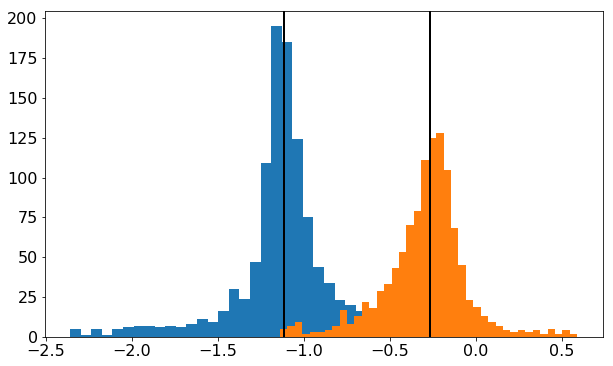

In [78]:


pmra,pmraerr,pmdec,pmdecerr = np.loadtxt(os.getcwd()+ r'\NGC663\ARE YOU NOT CORRECT\20PM.csv', skiprows=1,usecols=(7,8,9,10),unpack=True,delimiter=',')
plt.figure(5)
print(len(pmra))
pmramask=ap.sigma_clip(pmra,sigma=3,iters=15).mask
pmdecmask=ap.sigma_clip(pmdec,sigma=3,iters=15).mask
ma3=np.logical_or(pmramask,pmdecmask)
realmask=np.logical_not(ma3)
print(sum(realmask))

plt.hist(pmra[realmask],bins=40,label='PM-RA')
plt.hist(pmdec[realmask],bins=40,label='PM-Dec')
plt.axvline(x=np.median(pmra[realmask]),c='k')
plt.axvline(x=np.median(pmdec[realmask]),c='k')


1446 3.482244232815902
1298 2.387241796649344
1175 1.637754269359992
1087 1.159060319034553
1024 0.8984323538269492
33


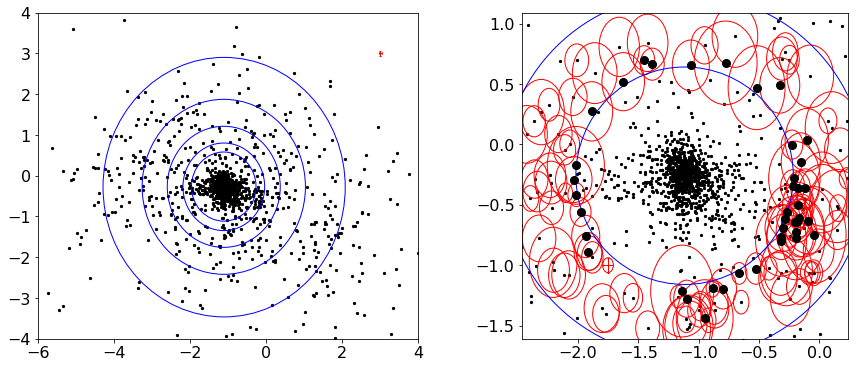

In [79]:
def ellipclipper(x,y,sigma=3,iters=5):
    xy=np.column_stack([x,y])
    for i in range(iters):
        medx=np.median(xy[:,0])
        medy=np.median(xy[:,1])
        xynorm=np.column_stack([xy[:,0]-medx,xy[:,1]-medy])
        norm=sum(np.linalg.norm(xynorm,axis=1))
        circle = plt.Circle((medx,medy), sigma*norm/(len(xy)-2), color='b',fill=False)
        plt.gca().add_artist(circle)
        #rect=plt.Rectangle((medx-sigma*norm/(len(xy)-2),medy-sigma*norm/(len(xy)-2)),width=2*sigma*norm/(len(xy)-2),height=2*sigma*norm/(len(xy)-2),fill=False,color='b')
        #plt.gca().add_artist(rect)
        xyz=np.column_stack([xy[:,0],xy[:,1],np.linalg.norm(xynorm,axis=1)])
        xy= xy[xyz[:,2]<=sigma*norm/len(xy)]
        print(len(xy),sigma*norm/len(xy))
    medx=np.median(xy[:,0])
    medy=np.median(xy[:,1])
    test= np.column_stack([x-medx,y-medy])
    #all the points outside of the last clip
    cuts= np.linalg.norm(test,axis=1)>sigma*norm/len(xy)
    return [medx,medy,sigma*norm/(len(xy)-2),cuts]
def ellipr(a,b,theta):
    return ((np.cos(theta)/a)**2. + (np.sin(theta)/b)**2.)**(-0.5) # returns radius

plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
#plt.errorbar(pmra,pmdec,xerr=pmraerr,yerr=pmdecerr,fmt='none',capsize=1,linewidth=1,c='k')
plt.errorbar(3,3,xerr=np.average(pmraerr),yerr=np.average(pmdecerr),fmt='none',capsize=1,linewidth=1,c='r')
plt.scatter(pmra,pmdec,s=5,c='k')
a=ellipclipper(pmra,pmdec)
medx,medy,finalr,clipcut=a[0],a[1],a[2],a[3]
plt.ylim(-4,4)
plt.xlim(-6,4)


test= np.column_stack([pmra-a[0],pmdec-a[1]])
farcut= np.linalg.norm(test,axis=1)<1.5*a[2]

plt.subplot(1,2,2)
#plt.errorbar(pmra,pmdec,xerr=pmraerr,yerr=pmdecerr,fmt='none',capsize=1,linewidth=1,c='k')
plt.errorbar(-1.75,-1,xerr=np.average(pmraerr),yerr=np.average(pmdecerr),fmt='none',capstyle='butt',capsize=1,linewidth=1,c='r')
ell=Ellipse((-1.75,-1),2*np.average(pmraerr),2*np.average(pmdecerr),fill=0,color='r')
plt.gca().add_artist(ell)
finalcut=np.logical_and(a[3],farcut)
test=[pmra[finalcut],pmdec[finalcut],pmraerr[finalcut],pmdecerr[finalcut]]
plt.scatter(pmra[finalcut][2],pmdec[finalcut][2],c='green')
ells2= [Ellipse(xy=(test[0][i],test[1][i]),width=6*test[2][i],height=6*test[3][i],fill=0,color='r') for i in range(len(test[1]))]
ells = [Ellipse(xy=(pmra[i],pmdec[i]), width=2*pmraerr[i], height=2*pmdecerr[i], fill=0,color='r') for i in range(len(pmra))]
for e in ells2:
    plt.gca().add_artist(e)
    pass

plt.scatter(pmra,pmdec,s=5,c='k')
plt.axis('square')
circle = plt.Circle((a[0],a[1]),a[2], color='b',fill=False)
plt.gca().add_artist(circle)
circle = plt.Circle((a[0],a[1]),1.3*1.15906, color='b',fill=False)
plt.gca().add_artist(circle)
plt.ylim(a[1]-1.5*a[2],a[1]+1.5*a[2])
plt.xlim(a[0]-1.5*a[2],a[0]+1.5*a[2])
print(33)
x1=pmra[finalcut]-medx
y1=pmdec[finalcut]-medy
R= [(x**2+y**2)**.5 for x,y in zip(x1,y1)]
a1=pmraerr[finalcut]
b1=pmdecerr[finalcut]
theta=np.arctan2(y1,x1) 
r1=[ellipr(3*a,3*b,theta) for a,b,theta in zip(a1,b1,theta)]
r2=[ellipr(finalr,finalr,theta+np.pi) for a,b,theta in zip(a1,b1,theta)]

include=[a+b>c for a,b,c in zip(r1,r2,R)]
plt.scatter(x1[include] +medx,y1[include]+medy,zorder=2,color='k')

#ells3= [Ellipse(x1[include][i] +medx,y1[include][i]+medy),width=6*test[2][i],height=6*test[3][i],fill=0,color='r') for i in range(len(test[1]))]





Starting MAclipping
3 1446.0
-1.103197677602838 -0.2805239357089031 1446.0 3.482244232815902
3 1298.0
-1.1119336949290632 -0.2722061007962726 1298.0 2.387241796649344
3 1177.0
-1.1128703105570388 -0.2721450695328156 1177.0 1.6403484038420757
3 1093.0
-1.111673731673275 -0.2721053803930113 1093.0 1.1917141575623975
3 1043.0
-1.112641397283804 -0.2661973681380958 1043.0 0.9632085327590689
33
[[-1.60025532 -0.71713732]
 [-1.08042655 -0.93331928]
 [-1.03406913 -1.09602168]
 [-1.34160138  0.36097822]
 [-1.74677226 -0.2446837 ]
 [-1.78093875 -0.21218128]
 [-1.15019323 -1.04561633]
 [-1.89350064 -0.11961287]
 [-1.60376007 -0.83051902]
 [-0.90411608  0.53107367]
 [-0.71453225 -1.01545952]
 [-1.77129538 -0.43277083]
 [-0.54227873 -0.60102137]
 [-1.2132215   0.42413597]
 [-1.07691346  0.43688334]
 [-1.93727304 -0.09428742]
 [-0.41219753 -0.51975094]
 [-1.54327308  0.17952468]
 [-0.46024995 -0.45985994]
 [-0.47960002  0.04911628]
 [-0.70293463 -0.78622032]
 [-1.84701973 -0.06331909]
 [-1.41673477

C:\Users\Erick\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


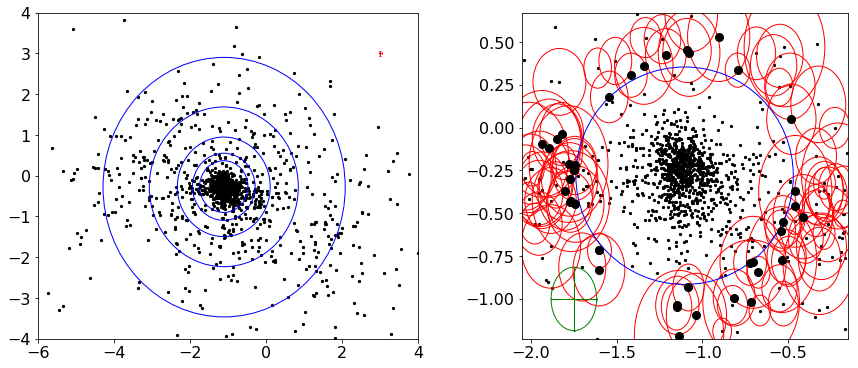

In [80]:
def maskclipper(x,y,sigma=3,iters=5):
    print("Starting MAclipping")
    xy=np.column_stack([x,y])
    xy2=xy[:,0]<min(xy[:,0])
    xy=np.ma.asarray(xy)
    for i in range(iters):
        
        medx=np.ma.median(xy[:,0][~xy[:,0].mask])
        medy=np.ma.median(xy[:,1][~xy[:,0].mask])
        
        
        xynorm=np.column_stack([xy[:,0]-medx,xy[:,1]-medy])
        norm=sum(np.linalg.norm(xynorm[~xy2],axis=1))
        
        if i == 1:
            ab=np.linalg.norm(xynorm[~xy2],axis=1)
        circle = plt.Circle((medx,medy), sigma*norm/(len(xy)-2), color='b',fill=False)
        plt.gca().add_artist(circle)
        
        xyz=np.column_stack([xy[:,0],xy[:,1],np.linalg.norm(xynorm,axis=1)])
        xyz=np.ma.asarray(xyz)
       

        xy2=np.ma.masked_greater(xyz[:,2],sigma*norm/(xy.count()/2)).mask
        stack=np.column_stack([xy2,xy2])

        xy=np.ma.MaskedArray(xy,mask=stack)
        print(sigma,xy.count()/2)
        print(medx,medy,xy.count()/2,sigma*norm/(xy.count()/2))
        #print('===========================================')
    medx=np.median(xy[:,0])
    medy=np.median(xy[:,1])
    test= np.column_stack([x-medx,y-medy])
    #all the points outside of the last clip
    cuts= np.linalg.norm(test,axis=1)>sigma*norm/len(xy)
    print('===========================================')
    return [medx,medy,sigma*norm/(len(xy)-2),cuts,ab,xy]
def ellipr(a,b,theta):
    return ((np.cos(theta)/a)**2. + (np.sin(theta)/b)**2.)**(-0.5) # returns radius

plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
#plt.errorbar(pmra,pmdec,xerr=pmraerr,yerr=pmdecerr,fmt='none',capsize=1,linewidth=1,c='k')
plt.errorbar(3,3,xerr=np.average(pmraerr),yerr=np.average(pmdecerr),fmt='none',capsize=1,linewidth=1,c='r')
plt.scatter(pmra,pmdec,s=5,c='k')
a=maskclipper(pmra,pmdec)
medx,medy,finalr,clipcut,ab,xy=a[0],a[1],a[2],a[3],a[4],a[5]
plt.ylim(-4,4)
plt.xlim(-6,4)

test= np.column_stack([pmra-a[0],pmdec-a[1]])
farcut= np.linalg.norm(test,axis=1)<1.5*a[2]

plt.subplot(1,2,2)
#plt.errorbar(pmra,pmdec,xerr=pmraerr,yerr=pmdecerr,fmt='none',capsize=1,linewidth=1,c='k')
plt.errorbar(-1.75,-1,xerr=3*np.average(pmraerr),yerr=3*np.average(pmdecerr),fmt='none',capstyle='butt',capsize=1,linewidth=1,c='green')
ell=Ellipse((-1.75,-1),6*np.average(pmraerr),6*np.average(pmdecerr),fill=0,color='green')
plt.gca().add_artist(ell)
finalcut=np.logical_and(a[3],farcut)
test=[pmra[finalcut],pmdec[finalcut],pmraerr[finalcut],pmdecerr[finalcut]]
plt.scatter(pmra[finalcut][2],pmdec[finalcut][2],c='green')
ells2= [Ellipse(xy=(test[0][i],test[1][i]),width=6*test[2][i],height=6*test[3][i],fill=0,color='r') for i in range(len(test[1]))]
ells = [Ellipse(xy=(pmra[i],pmdec[i]), width=2*pmraerr[i], height=2*pmdecerr[i], fill=0,color='r') for i in range(len(pmra))]
for e in ells2:
    plt.gca().add_artist(e)
    pass

plt.scatter(pmra,pmdec,s=5,c='k')
plt.axis('square')
circle = plt.Circle((a[0],a[1]),a[2], color='b',fill=False)
plt.gca().add_artist(circle)
circle = plt.Circle((a[0],a[1]),1.3*1.15906, color='b',fill=False)
plt.gca().add_artist(circle)
plt.ylim(a[1]-1.5*a[2],a[1]+1.5*a[2])
plt.xlim(a[0]-1.5*a[2],a[0]+1.5*a[2])
print(33)
x1=pmra[finalcut]-medx
y1=pmdec[finalcut]-medy
R= [(x**2+y**2)**.5 for x,y in zip(x1,y1)]
a1=pmraerr[finalcut]
b1=pmdecerr[finalcut]
theta=np.arctan2(y1,x1) 
r1=[ellipr(3*a,3*b,theta) for a,b,theta in zip(a1,b1,theta)]
r2=[ellipr(finalr,finalr,theta+np.pi) for a,b,theta in zip(a1,b1,theta)]

include=[a+b>c for a,b,c in zip(r1,r2,R)]
plt.scatter(x1[include] +medx,y1[include]+medy,zorder=2,color='k')
unmaskthese=np.column_stack([x1[include] +medx,y1[include]+medy])
print(unmaskthese)

Text(0,0.5,'Counts')

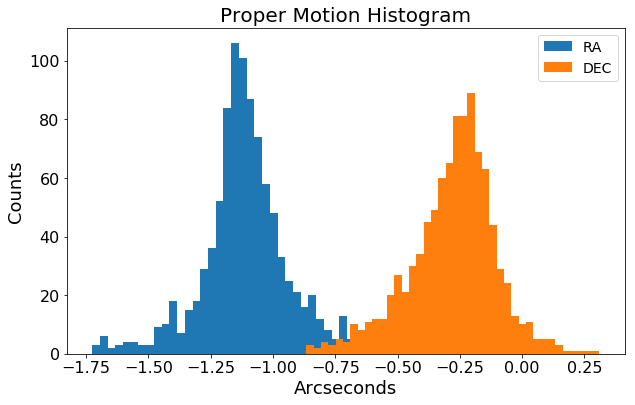

In [81]:
#plt.scatter(pmra[~clipcut],pmdec[~clipcut])
plt.hist(pmra[~clipcut],bins=40,label='RA')
plt.hist(pmdec[~clipcut],bins=40,label='DEC')
plt.legend()
plt.title("Proper Motion Histogram")
plt.xlabel("Arcseconds")
plt.ylabel("Counts")


In [82]:
print(len(pmra),len(a[4]))

1584 1446


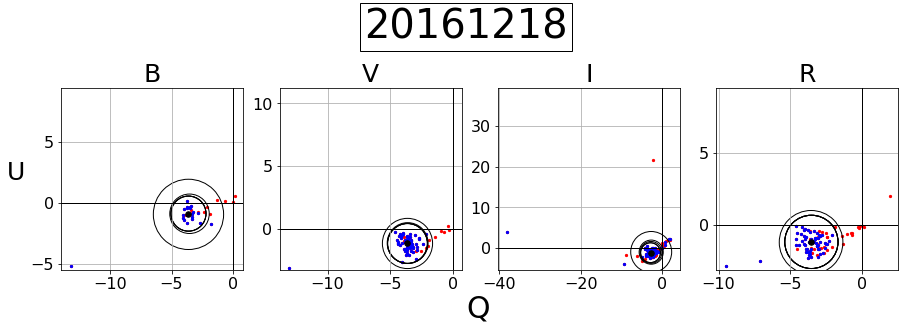

In [83]:
key='20161218'
plt.figure(1,figsize=(15,5),frameon=True)
plt.figtext(x=.075,y=.5,s='U',fontsize='25')
plt.figtext(x=0.5,y=0.1,va='bottom',s='Q',fontsize='30')
plt.suptitle(key,fontsize=40,bbox=dict(facecolor='none', edgecolor='k'))
n=1
qu[key]={'B':[],'V':[],'I':[],'R':[]}
for color in ['B','V','I','R']:
    plt.subplot(1,4,n)
    plt.grid()
    plt.title(color,fontsize=25)
    if color in data[key].keys():

        try:
            ind = cuts(key,color)
            q=data[key][color][2].astype(float)
            u=data[key][color][4].astype(float)
            qcut=data[key][color][2][(ind).astype(int)].astype(float)
            ucut=data[key][color][4][(ind).astype(int)].astype(float)
            plt.scatter(q,u,c='r',s=5,label=color)
            plt.scatter(qcut,ucut,c='b',s=5,label=color[0])

            qumed= clipper(qcut,ucut,sigma=2.5)
            qu[key][color]=[qumed[0],qumed[1]]
            plt.scatter(qumed[0],qumed[1],s=30,c='k')
        except:
            plt.scatter(data[key][color][2].astype(float),data[key][color][4].astype(float),c='k',s=5,label=color)
    else:
        plt.text(-.055,-.01,'NO DATA',fontsize=40)
    plt.axhline(c='k',lw=1)
    plt.axvline(c='k',lw=1)
    n=n+1
    plt.axis('square')


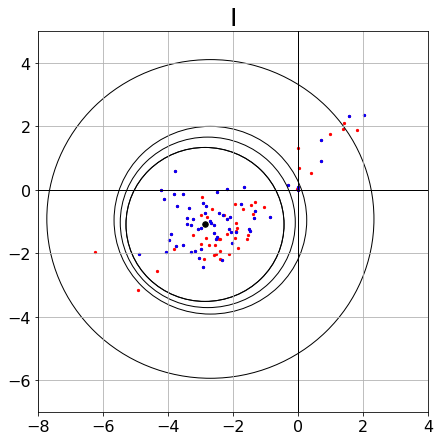

In [84]:
key='20161218'
color='I'
plt.figure(figsize=(7,7))
plt.grid()
plt.title(color,fontsize=25)
if color in data[key].keys():

    ind = cuts(key,color)
    q=data[key][color][2].astype(float)
    u=data[key][color][4].astype(float)
    qcut=data[key][color][2][(ind).astype(int)].astype(float)
    ucut=data[key][color][4][(ind).astype(int)].astype(float)
    plt.scatter(q,u,c='r',s=5,label=color)
    plt.scatter(qcut,ucut,c='b',s=5,label=color[0])

    qumed= clipper(qcut,ucut,sigma=2.5)
    qu[key][color]=[qumed[0],qumed[1]]
    plt.scatter(qumed[0],qumed[1],s=30,c='k')
plt.xlim(-8,4)
plt.ylim(-7,5)
plt.axhline(c='k',lw=1)
plt.axvline(c='k',lw=1)


In [85]:
import sys